<a href="https://colab.research.google.com/github/mathara/imersao-dados-desafio-final/blob/main/Notebooks/Desafio_Descoberta_Componentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importações das bibliotecas




In [222]:
import pandas   as pd
import seaborn  as sns
import matplotlib
from   matplotlib import pyplot as plt
import numpy    as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
sns.set()

#### Importações das bases


##### Dados Entrada


In [138]:
#importando as bases de dados do github
url_dados = 'https://github.com/mathara/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')


In [139]:
dados.columns = dados.columns.str.replace('-','')

In [140]:
mapa ={'droga':'composto'}
dados.rename(columns=mapa, inplace=True)

In [141]:
dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [142]:
dados.shape
print('O dataset possui {} linhas e {} colunas'.format(dados.shape[0], dados.shape[1]))

O dataset possui 23814 linhas e 877 colunas


Conseguimos carregar a base de dados corretamente. Iremos iniciar a etapa de exploração dos dados, dessa forma busco descobrir como cada uma das 877 variáveis estão relacionadas e as suas finalidades.

##### Dados Resultados


In [179]:
#diretório da base de dados
url_dados = 'https://github.com/mathara/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'

#leitura dos dados e printar
#inibidor, antagonista, receptor : mecanismos de ação
resultados = pd.read_csv(url_dados)

In [180]:
resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
print('O dataset possui {} linhas e {} colunas'.format(resultados.shape[0], resultados.shape[1]))

O dataset possui 23814 linhas e 207 colunas


### Análise geral

#### Variáveis :
`id`: Identifiação

`tratamento`: o tipo de tratamento utilizado

`tempo`: tempo de aplicação das droga utilizada

`dose`: dosagem testada

`composto`': a droga ou composto usado para realizar o teste. Iremos nos referir a droga como composto durante a análise do projeto.

`g - x`: apresenta a informação de como o gene se expressou, após ser exposto a droga em estudo

`c - x`: apresenta a informação da linhagem celular,células que não perderam as características de origem e possuem alta proliferação.


#### Primeiros insights

Da nossa base de dados, observamos uma concetração de 91% do tratamento *com_droga*, 51% com a dosagem do tipo *D1* e quase que uniforme na distrinuição do tempo, porém a exposição de *48* se sobressai com 34,6%.

No experimento foram testados 3289 compostos, os 7 compostos mais testadas representam 15% da base total. 

#### Como está distribuído o experimento pelo tipo de tratamento ?

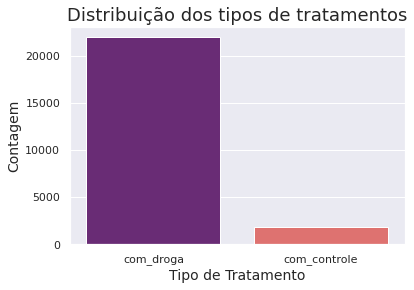

<Figure size 720x576 with 0 Axes>

In [143]:
ax = sns.countplot(x = 'tratamento', data = dados, palette = "magma" )
plt.figure(figsize= (10,8))
ax.set_title('Distribuição dos tipos de tratamentos', fontsize = 18)
ax.set_xlabel('Tipo de Tratamento', fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 14)
plt.show()

In [144]:
dados['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

#### Como está distribuído o experimento pelo tipo de dosagem ?

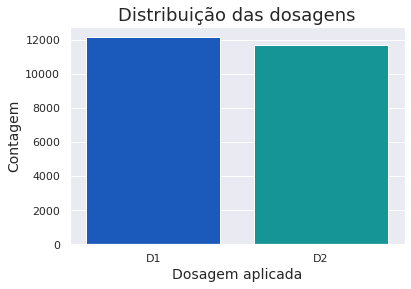

<Figure size 720x576 with 0 Axes>

In [145]:
ax = sns.countplot(x = 'dose', data = dados, palette ="winter")
plt.figure(figsize= (10,8))
ax.set_title('Distribuição das dosagens', fontsize = 18)
ax.set_xlabel('Dosagem aplicada', fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 14)
plt.show()

In [146]:
dados['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

#### Como está distribuído o experimento pela quantidade de tempo ?

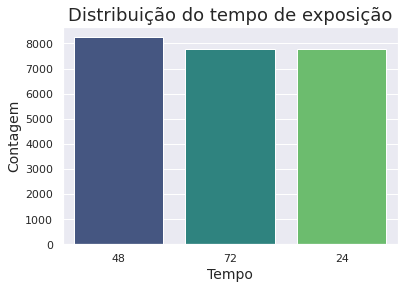

<Figure size 720x576 with 0 Axes>

In [147]:
ax = sns.countplot(x = 'tempo', data = dados, order = [48,72,24], palette ="viridis")
plt.figure(figsize= (10,8))
ax.set_title('Distribuição do tempo de exposição', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 14)
plt.show()

In [148]:
dados['tempo'].value_counts(normalize = True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

#### Quantos compostos foram testadas ?
#### Quais compostos mais testados no experimento ?


In [149]:
dados['composto'].nunique()

3289

In [150]:
composto = dados['composto'].value_counts(normalize = True).index[0:7]
composto

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee',
       'd08af5d4b', '292ab2c28'],
      dtype='object')

In [151]:
percent_composto = dados['composto'].value_counts(normalize = True)[0:7].sum()
percent_composto

0.15222138238011254

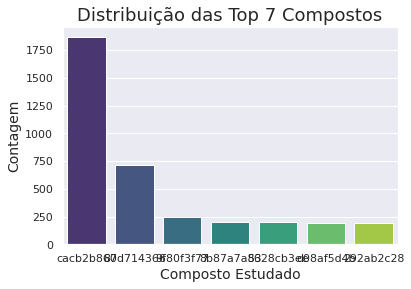

<Figure size 720x576 with 0 Axes>

In [152]:
ax = sns.countplot(x = 'composto', data = dados.query('composto in @composto'), order = composto, palette ="viridis")
plt.figure(figsize= (10,8))
ax.set_title('Distribuição das Top 7 Compostos', fontsize = 18)
ax.set_xlabel('Composto Estudado', fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 14)
plt.show()

#### Como a dosagem, o tempo e o tipo de tratamento se relacionam na distribuição em conjunto ?

In [153]:
pd.crosstab([dados['tratamento'],dados['dose']], dados['tempo'], normalize= True)

tempo                    24        48        72
tratamento   dose                              
com_controle D1    0.012640  0.014403  0.012892
             D2    0.012808  0.012808  0.012808
com_droga    D1    0.150542  0.168430  0.151172
             D2    0.150374  0.150794  0.150332

#### Visão geral dos Genes

In [154]:
dados.loc[:,'g0':'g771'].describe().T

,count,mean,std,min,25%,50%,75%,max
g0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


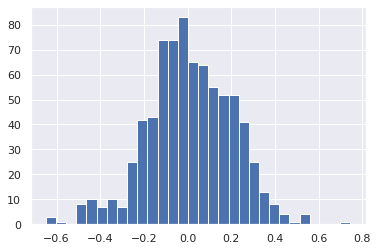

In [155]:
dados.loc[:,'g0':'g771'].describe().T['mean'].hist(bins = 30)

#### Visão geral da Linhagem Celular 

In [156]:
dados.loc[:,'c0':'c99'].describe().T

,count,mean,std,min,25%,50%,75%,max
c0,23814.0,-0.355156,1.752565,-10.0,-0.549300,-0.00900,0.448975,3.365
c1,23814.0,-0.455359,2.004962,-10.0,-0.538425,0.00980,0.476875,3.915
c2,23814.0,-0.480542,2.039346,-10.0,-0.550375,-0.00400,0.460575,2.970
c3,23814.0,-0.377666,1.554583,-10.0,-0.601975,-0.03905,0.413100,2.408
c4,23814.0,-0.493552,2.091888,-10.0,-0.559975,0.01140,0.470300,4.555
...,...,...,...,...,...,...,...,...
c95,23814.0,-0.353726,1.629291,-10.0,-0.567975,-0.01025,0.444750,2.814
c96,23814.0,-0.463485,2.059725,-10.0,-0.552575,-0.00125,0.465225,3.505
c97,23814.0,-0.378241,1.703615,-10.0,-0.561000,-0.00680,0.446400,2.924
c98,23814.0,-0.470252,1.834828,-10.0,-0.592600,0.01400,0.461275,3.111


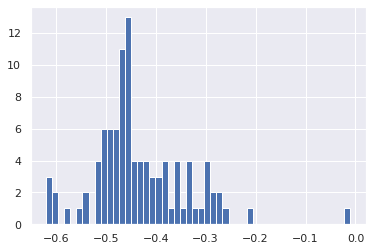

In [157]:
dados.loc[:,'c0':'c99'].describe().T['mean'].hist(bins = 50)

#### Genes e Células estão correlacionados ?
#### Como posso ver isso em relação ao tempo? E ao tratamento?

In [158]:
genes   = dados.query('tratamento == "com_droga"').loc[:,'g0':'g49']
celulas = dados.query('tratamento == "com_droga"').loc[:,'c0':'c49']

#serve para unir os genes e celulas para gerar a correlacao
uniao = pd.concat([genes,celulas], axis = 1)
corr = uniao.corr()
corr_recorte = corr.loc[:'g49','c0':'c49']

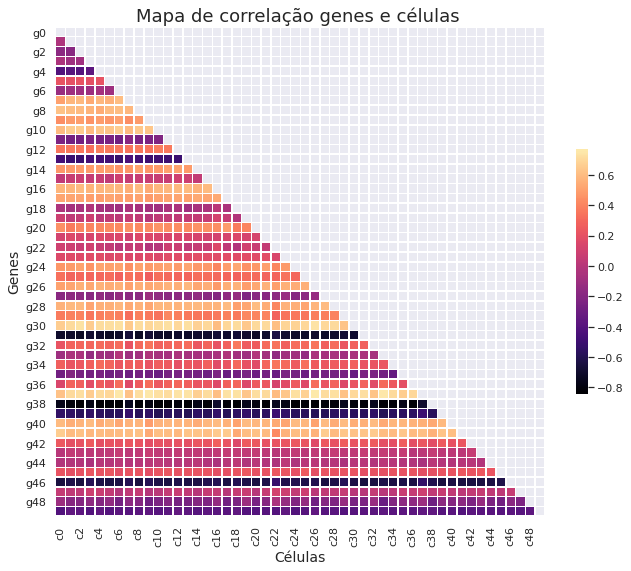

In [165]:
corr = corr_recorte
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='magma', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Mapa de correlação genes e células ', fontsize = 18)
ax.set_xlabel('Células', fontsize = 14)
ax.set_ylabel('Genes', fontsize = 14)
plt.show()

Analisando o mapa de calor, eu fiquei cuirioso para avaliar o comportamento dos seguintes genes, *g:8,30,31,37,38,40 e 46* , com a célula *c8*.

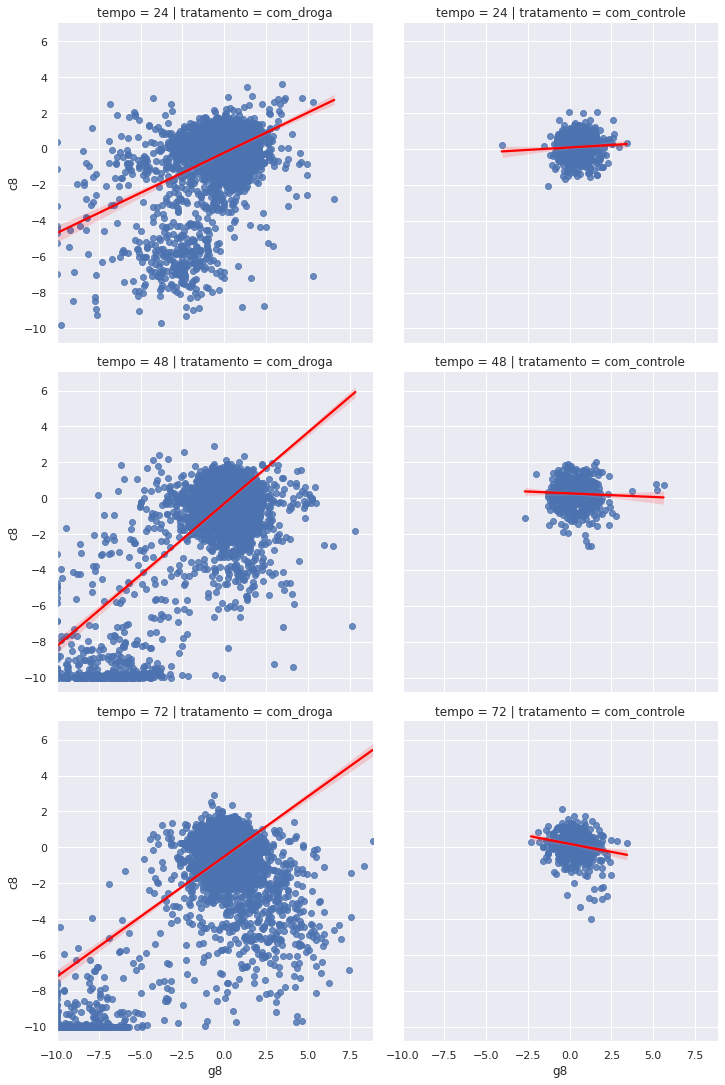

In [177]:
sns.lmplot(data=dados, x ='g8', y ='c8', line_kws={'color':'red'}, col ='tratamento', row ='tempo')

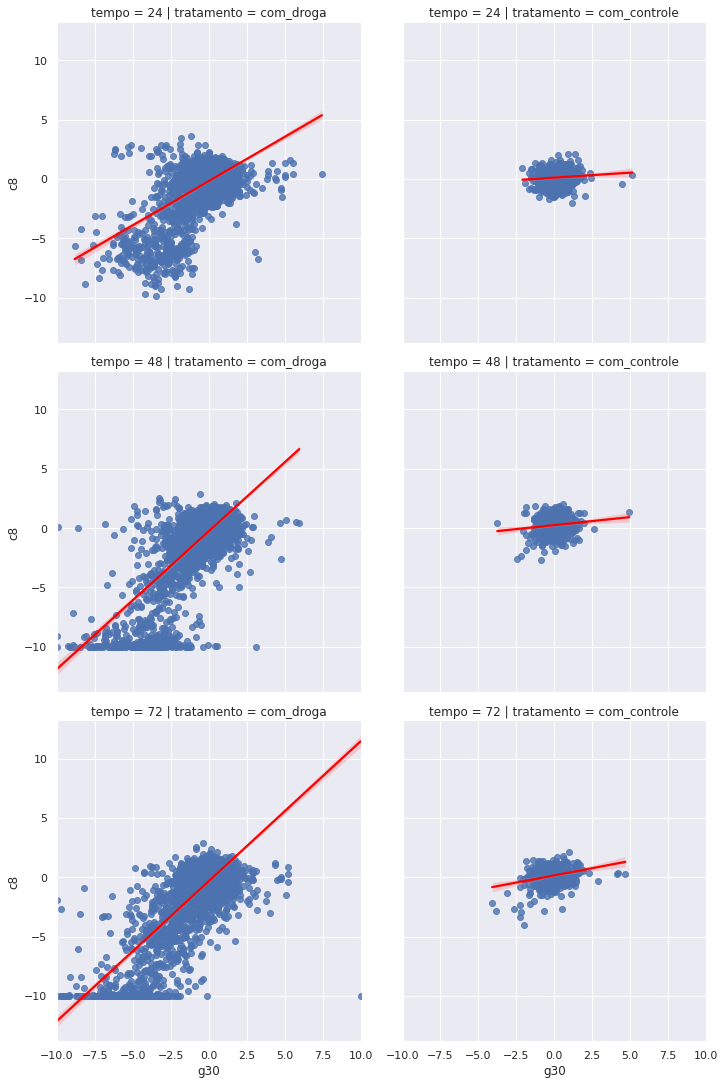

In [169]:
sns.lmplot(data=dados, x ='g30', y ='c8', line_kws={'color':'red'}, col ='tratamento', row ='tempo')

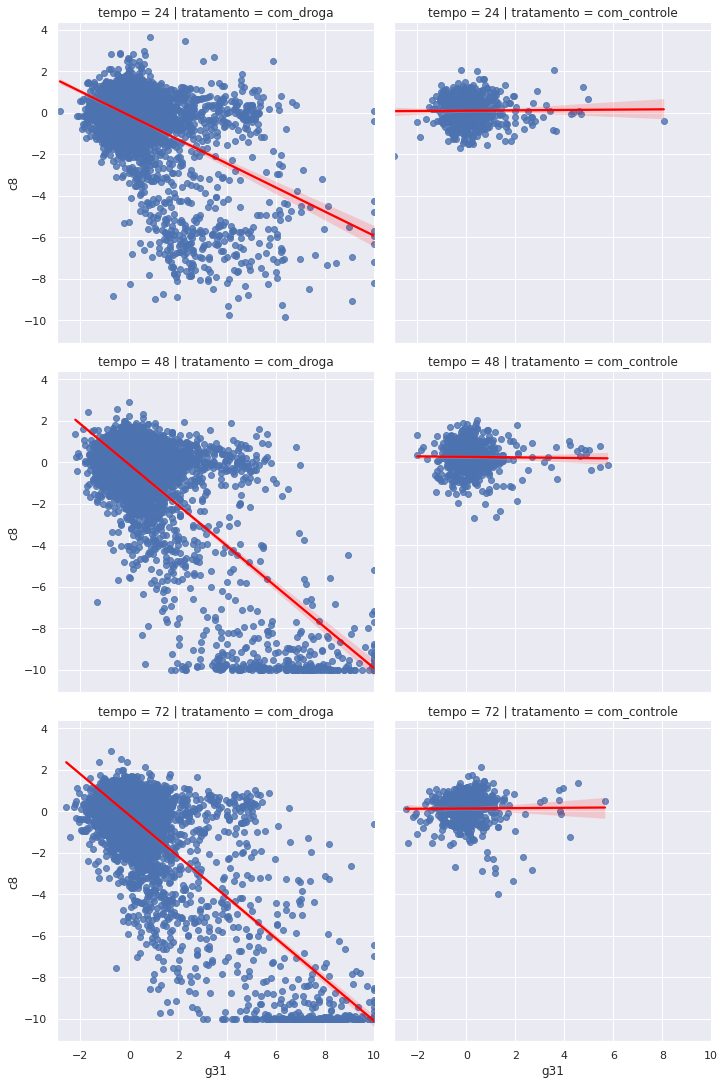

In [170]:
sns.lmplot(data=dados, x ='g31', y ='c8', line_kws={'color':'red'}, col ='tratamento', row ='tempo')

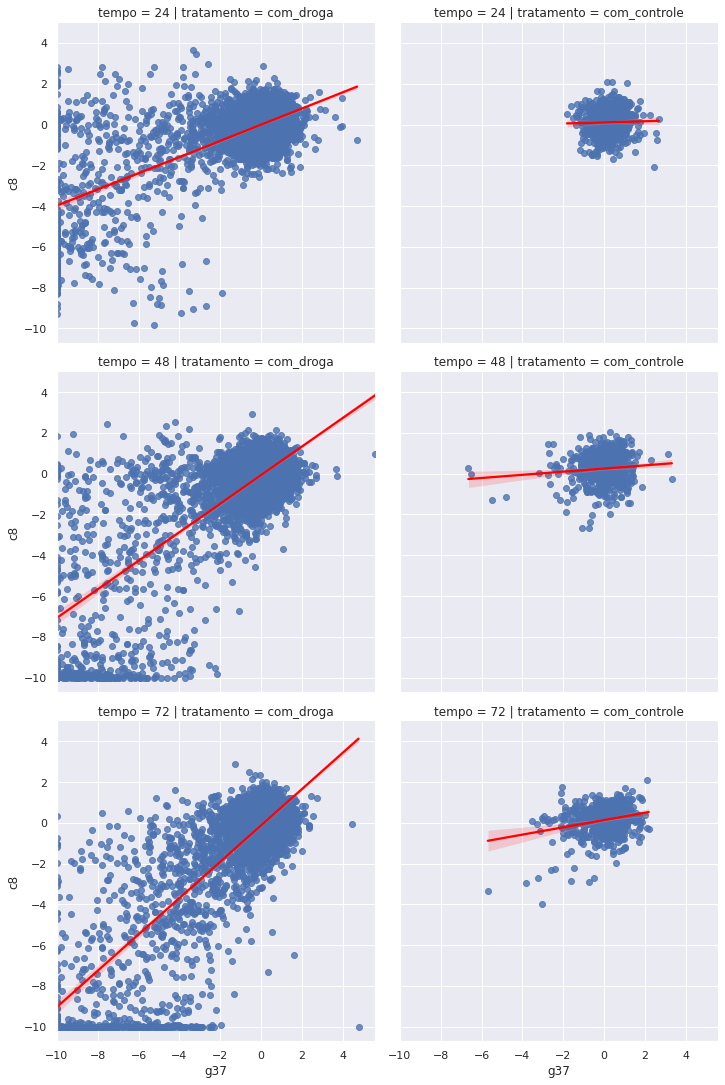

In [171]:
sns.lmplot(data=dados, x ='g37', y ='c8', line_kws={'color':'red'}, col ='tratamento', row ='tempo')

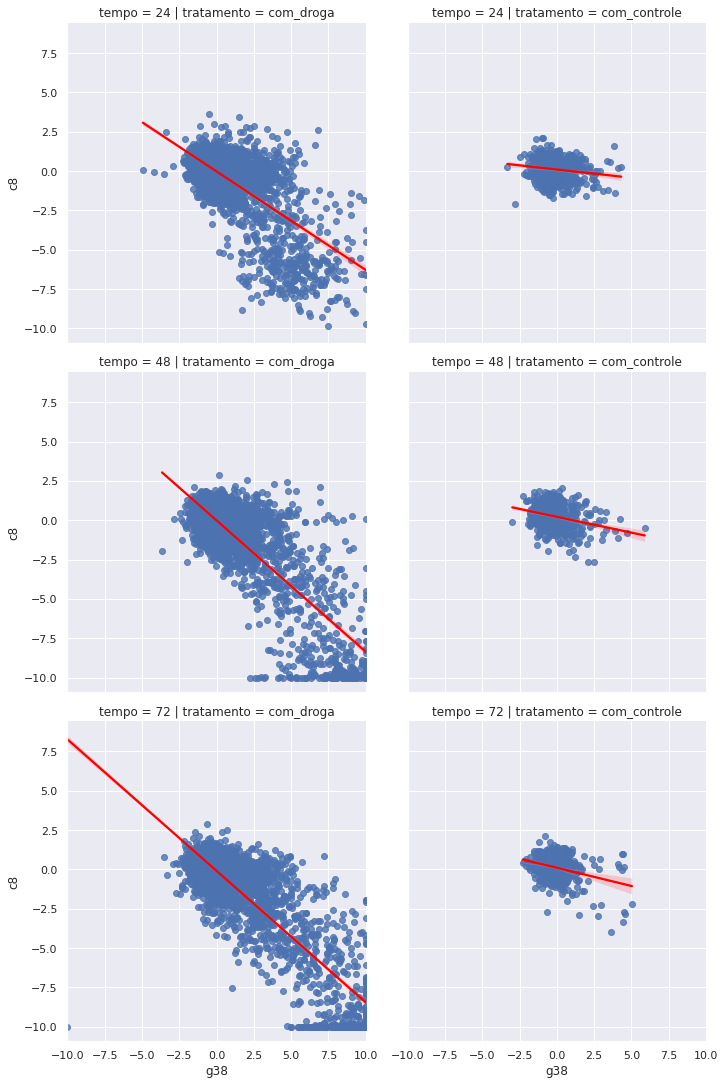

In [172]:
sns.lmplot(data=dados, x ='g38', y ='c8', line_kws={'color':'red'}, col ='tratamento', row ='tempo')

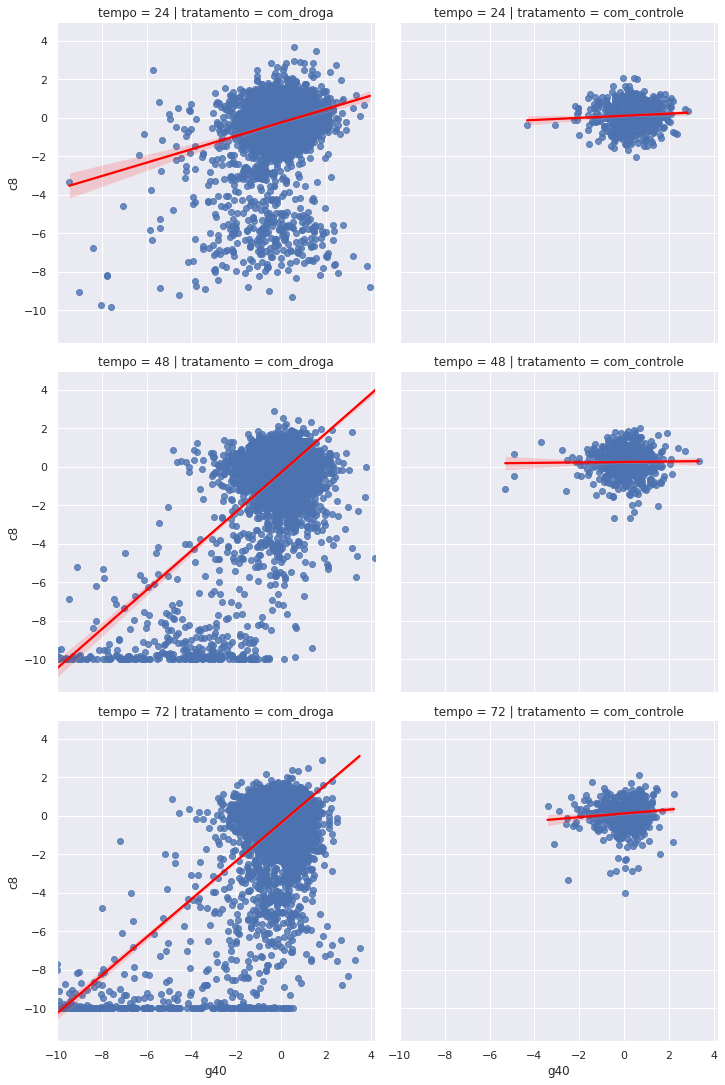

In [173]:
sns.lmplot(data=dados, x ='g40', y ='c8', line_kws={'color':'red'}, col ='tratamento', row ='tempo')

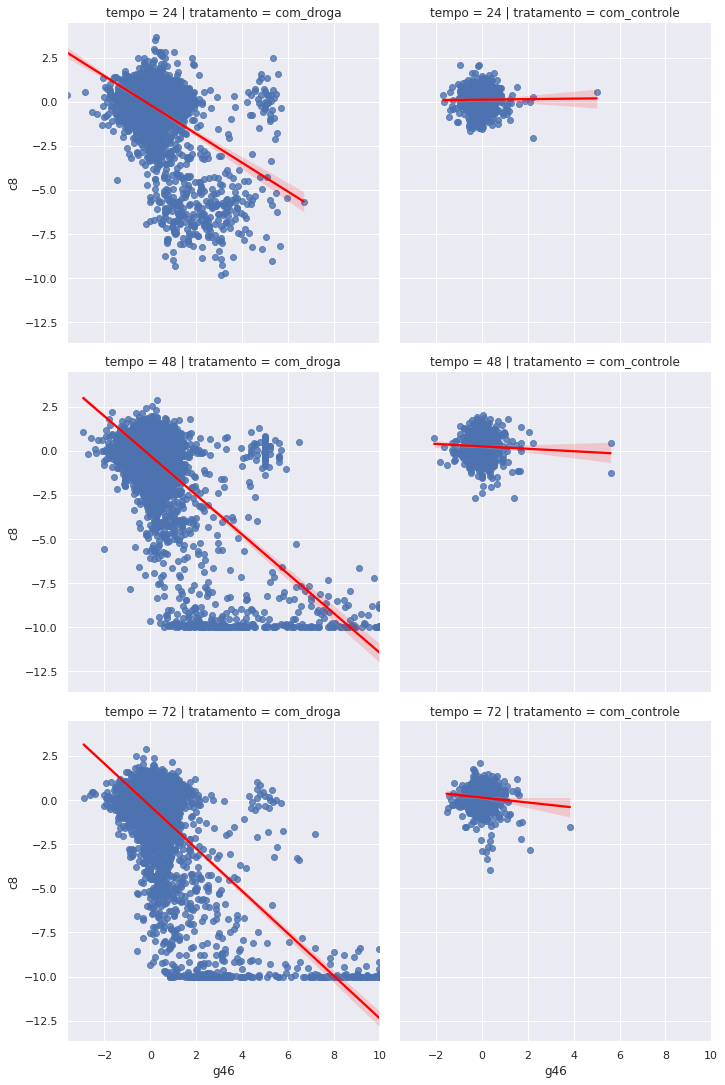

In [174]:
sns.lmplot(data=dados, x ='g46', y ='c8', line_kws={'color':'red'}, col ='tratamento', row ='tempo')

Analisando a correlação dos genes *g:
8,30,31,37,38,40 e 46*, com as células *c8*, pude tomar algumas observações gerais: o tempo influência fortemente na inclinação da reta de correlação, tanto para o tratamento com ou sem droga. O tratamento de controle busca aproxima-se de um comportamento bem estável.

### Análise Base Resultado

In [184]:
resultados.describe().T

,count,mean,std,min,25%,50%,75%,max
5-alpha_reductase_inhibitor,23814.0,0.000714,0.026709,0.0,0.0,0.0,0.0,1.0
11-beta-hsd1_inhibitor,23814.0,0.000756,0.027483,0.0,0.0,0.0,0.0,1.0
acat_inhibitor,23814.0,0.001008,0.031731,0.0,0.0,0.0,0.0,1.0
acetylcholine_receptor_agonist,23814.0,0.007979,0.088967,0.0,0.0,0.0,0.0,1.0
acetylcholine_receptor_antagonist,23814.0,0.012640,0.111716,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
ubiquitin_specific_protease_inhibitor,23814.0,0.000252,0.015871,0.0,0.0,0.0,0.0,1.0
vegfr_inhibitor,23814.0,0.007139,0.084190,0.0,0.0,0.0,0.0,1.0
vitamin_b,23814.0,0.001092,0.033025,0.0,0.0,0.0,0.0,1.0
vitamin_d_receptor_agonist,23814.0,0.001638,0.040436,0.0,0.0,0.0,0.0,1.0


In [186]:
resultados['acat_inhibitor'].unique()

array([0, 1])

A base de resultados nos mostra se o mecanismo de ativação teve ou não alguma ativação, pois os valores de cada coluna pode ser 0 ou 1, ativou ou não.

#### Quais foram os mecanismos mais ativados ?

In [225]:
contagem_moa = resultados.select_dtypes('int64').sum().sort_values(ascending=False)[0:7]
contagem_moa

nfkb_inhibitor                   832
proteasome_inhibitor             726
cyclooxygenase_inhibitor         435
dopamine_receptor_antagonist     424
serotonin_receptor_antagonist    404
dna_inhibitor                    402
glutamate_receptor_antagonist    367
dtype: int64

#### Quantos mecanimos cada drogra ativou ?


In [190]:
resultados['n_moa'] = resultados.drop('id', axis =1).sum(axis = 1)

In [191]:
resultados['ativo_moa'] = (resultados['n_moa'] != 0)
resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


Para as seguintes análises irei combinar a base de *entrada* e a de *resultados*, através do *id*

In [192]:
dados_resultados = pd.merge(dados, resultados[['id','n_moa','ativo_moa']], on= 'id')
dados_resultados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


#### O grupo de controle apresentou alguma ativação ?



In [194]:
dados_resultados.query('tratamento == "com_controle"')['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

Não tivemos nenhuma ativação, comprovando que o grupo de controle serve ao propósito e não teve nenhuma contaminação ao longo do projeto.

#### O grupo com aplicação de composto apresentou alguma ativação ?

In [195]:
dados_resultados.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

#### Os top 7 compostos tiveram ativação no gene 8?



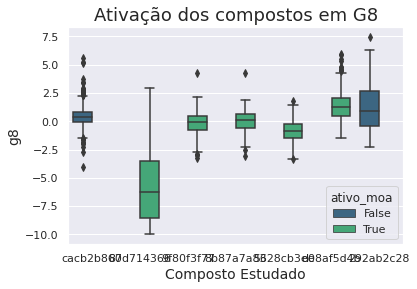

<Figure size 864x576 with 0 Axes>

In [211]:
ax = sns.boxplot(data = dados_resultados.query('composto in @composto'), y = 'g8', x = 'composto', hue ='ativo_moa', order = composto, palette ="viridis")
plt.figure(figsize=(12,8))
ax.set_title('Ativação dos compostos em G8', fontsize = 18)
ax.set_xlabel('Composto Estudado', fontsize = 14)
ax.set_ylabel('g8', fontsize = 14)
plt.show()

#### Os top 7 compostos tiveram ativação no gene 38?

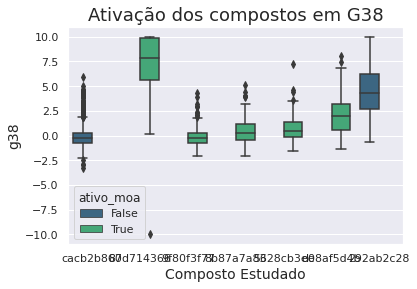

<Figure size 864x576 with 0 Axes>

In [212]:
ax = sns.boxplot(data = dados_resultados.query('composto in @composto'), y = 'g38', x = 'composto', hue ='ativo_moa', order = composto, palette ="viridis")
plt.figure(figsize=(12,8))
ax.set_title('Ativação dos compostos em G38', fontsize = 18)
ax.set_xlabel('Composto Estudado', fontsize = 14)
ax.set_ylabel('g38', fontsize = 14)
plt.show()

### Modelos de Machine Learning(ML)

#### Adequação da Base
Será necessário arrumar algumas colunas categóricas como : 'tratamento', 'tempo' e 'dose', em novas colunas com valores interios para representarem o conteúdo armazenado, dessa forma, poderemos utilizar para o treinamento do modelo.

In [217]:
x = dados_resultados.drop(['id','n_moa','ativo_moa','composto'], axis = 1 )
x = pd.get_dummies(x, columns = ['tratamento', 'dose','tempo'])
y = dados_resultados['ativo_moa']

Separação dos conjuntos de treino e teste:

In [247]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.30 ,stratify = y, random_state =8318)

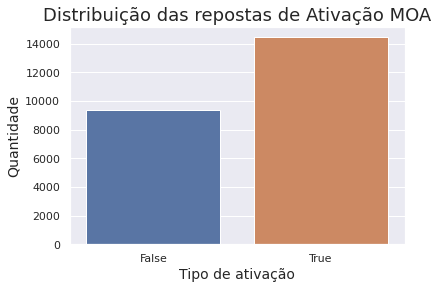

<Figure size 720x576 with 0 Axes>

In [248]:
ax = sns.barplot(x=dados_resultados['ativo_moa'].value_counts().index, y=dados_resultados['ativo_moa'].value_counts())
plt.figure(figsize= (10,8))
ax.set_title('Distribuição das repostas de Ativação MOA', fontsize = 18)
ax.set_xlabel('Tipo de ativação', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
plt.show()

In [245]:
dados_resultados['ativo_moa'].value_counts(normalize = True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

#### Modelo Dummie
Esse é o modelo que chuta a resposta que tem a maior frequência, um modelo de ML, precisa apresentar um resultado satisfatóriamente acima desse modelo simples de chute. Como podemos ver no gráfico anterior, se chutassemos tudo verdadeiro, teríamos uma taxa de acerto de *60%*.

In [249]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.6067179846046186

#### Regressão Logística


In [272]:
#max_iter ajuda para convergir
model_rlogistica = LogisticRegression(max_iter= 1000)
#fit serve apra realizar o treino
model_rlogistica.fit(x_treino,y_treino)
#verifica o quão bom é o modelo
model_rlogistica.score(x_teste,y_teste)

0.672778166550035

#### Árvore de Decisão

In [252]:
teste  =  []
treino =  []

for i in range(1,15):
      modelo_arvore = DecisionTreeClassifier(max_depth= i )
      modelo_arvore.fit (x_treino,y_treino)
      treino.append (modelo_arvore.score(x_treino,y_treino))
      teste.append  (modelo_arvore.score(x_teste,y_teste))

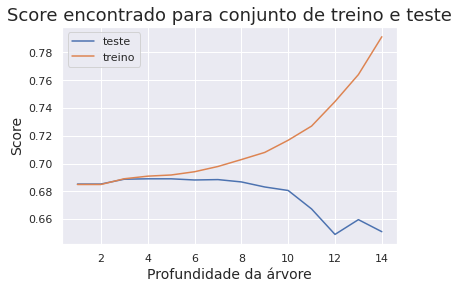

<Figure size 720x576 with 0 Axes>

In [254]:
ax = sns.lineplot(x =range(1,15), y =teste, label ='teste')
ax = sns.lineplot(x =range(1,15), y =treino, label ='treino')
plt.figure(figsize= (10,8))
ax.set_title('Score encontrado para conjunto de treino e teste', fontsize = 18)
ax.set_xlabel('Profundidade da árvore', fontsize = 14)
ax.set_ylabel('Score', fontsize = 14)
plt.show()

In [269]:
for i in range(0,14):
  if (teste[i] == max(teste)):
    print("A árvore de profundidade {} apresenta a melhor performance de {}.".format(i+1, max(teste)) )

A árvore de profundidade 4 apresenta a melhor performance de 0.6890132960111967.
A árvore de profundidade 5 apresenta a melhor performance de 0.6890132960111967.


#### RandomForest


In [270]:
modelo_ramdom_floresta = RandomForestClassifier()
modelo_ramdom_floresta.fit (x_treino,y_treino)
modelo_ramdom_floresta.score(x_teste,y_teste)

0.6878936319104269

### Coclusões

Os modelos testados apresentaram os seguintes resultados:


* Dummie : *60%*
* Regressão Logística : *67%*
* Árvore de Decisão : *~69%*
* RandomForest : *~69%*



De fato os modelos testados, ainda se encontram em estágio inicial, ainda precisariamos estudar melhor o tuning dos modelos, para dessa forma apresentaram uma perfonce considerávelmente melhor que o Modelo Dummie. 

Em relação à todos os modelos testados, os melhores modelos testados apresentaram um ganho de 9p.p, em relação ao mais simplório.

### Referências

[Drug and Discovery](https://docs.google.com/document/d/10EhrQBChlyYIcff3to7PrCQi5HcNk2r-zd2ZCKPtcz8/edit)

[Expressão Gênica](https://drive.google.com/file/d/1VNP08ffCiGD8cqaBkdHATWSX8Yxfm3dj/view)

[Visualização de dados com Seaborn](https://medium.com/@gisely.alves/visualização-de-dados-com-seaborn-2fd0defd9adb)

[Seaborn](https://seaborn.pydata.org)

[Pandas](https://pandas.pydata.org/docs/reference/index.html)


### Contato
**Autor:**
Matheus Mendes Araujo

**Repositório pessoal:**
https://github.com/mathara

**Linkedin**:
https://www.linkedin.com/in/matheusmnda/

### Agradecimentos

Quero agradecer a [Alura](https://www.alura.com.br/) por me proporcionar uma experiência com Data Science, na prática, descomplicando o uso de python com dados e me dando várias ferramentas para encarar novos desafios. Aos instrutores, Guilherme Silveira, Thiago G. Santos e a Vanessa Leiko, por me abrirem nesse novo leque de conhecimento.
> Ao apoio da minha família nesse final de semana de estudos, e da minha namorada que indicou e incentivou a participar dessa imersão para me aprimorar em dados.